In [312]:
#Importing necessary libraries.

from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [313]:
# Set directories.

os.chdir('E:\Social Media Data Analytics\Assignment 2') #<---- Change Directory accordingly
curr_directory = os.getcwd()
path1 = curr_directory + "/Final_Dataset2.csv"  
path2 = curr_directory + "/Train.csv"  
path3 = curr_directory + "/Test.csv"  


In [314]:
#Read all files.

Data1 = pd.read_csv(path1)
Data2 = pd.read_csv(path2)
Data3 = pd.read_csv(path3)

In [315]:
df = Data1
df

,id,text,length,author
0,1,Wonder why this would not be covered under PNG...,51,TimOfAltona
1,2,Interesting hypothesis - doubt there will be l...,42,TimOfAltona
2,3,Spot on - the only problem is that Abbott will...,46,TimOfAltona
3,4,To the contrary - the government have released...,44,TimOfAltona
4,5,The government was always going to take a hit ...,30,TimOfAltona
...,...,...,...,...
1795,1796,If you disagree/find errors with what Wikipedi...,31,InfinityAndBeyond
1796,1797,I don't understand. You say that reducing emis...,39,InfinityAndBeyond
1797,1798,I do agree with you with the exponential popul...,69,InfinityAndBeyond
1798,1799,But somehow for Australia taking in all the mi...,35,InfinityAndBeyond


In [316]:
Train = Data2
Train

,id,text,length,author
0,1,Wonder why this would not be covered under PNG...,51,TimOfAltona
1,2,Interesting hypothesis - doubt there will be l...,42,TimOfAltona
2,3,Spot on - the only problem is that Abbott will...,46,TimOfAltona
3,4,To the contrary - the government have released...,44,TimOfAltona
4,5,The government was always going to take a hit ...,30,TimOfAltona
...,...,...,...,...
895,1496,"It is easy to make a grandiose announcement, b...",45,InfinityAndBeyond
896,1497,"By stop the war, that means to let ISIS advanc...",40,InfinityAndBeyond
897,1498,You don't think a lot of effort goes into tryi...,46,InfinityAndBeyond
898,1499,So you think a sharks life is worth more than ...,48,InfinityAndBeyond


In [317]:
Test = Data3
Test

,id,text,length,author
0,301,"Actually Matt, it was the Japanese that posed ...",43,TimOfAltona
1,302,Wrong thread pal - if you scroll up you will s...,37,TimOfAltona
2,303,Good comment - unfortunately the Labor/Greens ...,45,TimOfAltona
3,304,Tony Abbott has already been credited with sav...,90,TimOfAltona
4,305,Good to see the government pushing on with it'...,53,TimOfAltona
...,...,...,...,...
895,1796,If you disagree/find errors with what Wikipedi...,31,InfinityAndBeyond
896,1797,I don't understand. You say that reducing emis...,39,InfinityAndBeyond
897,1798,I do agree with you with the exponential popul...,69,InfinityAndBeyond
898,1799,But somehow for Australia taking in all the mi...,35,InfinityAndBeyond


<Figure size 72000x72000 with 0 Axes>

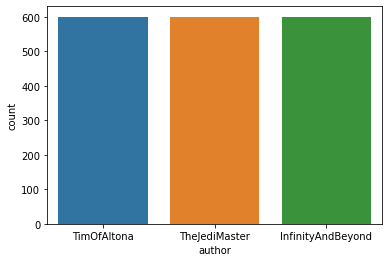

<Figure size 72000x72000 with 0 Axes>

In [318]:
import seaborn as sns
sns.countplot('author',data = df)
plt.figure(figsize = (1000, 1000))

In [319]:
#df['length'] = df.text.str.count(' ')
#df

In [320]:
df[df["author"]=="TimOfAltona"]["length"].describe()

count    600.000000
mean      44.706667
std       14.589221
min       30.000000
25%       34.000000
50%       41.000000
75%       50.000000
max      160.000000
Name: length, dtype: float64

In [321]:
#df[df["author"]=="Moon007"]["length"].describe()

In [322]:
df[df["author"]=="TheJediMaster"]["length"].describe()

count    600.000000
mean      37.666667
std        7.631467
min       30.000000
25%       32.000000
50%       35.000000
75%       41.000000
max       78.000000
Name: length, dtype: float64

In [323]:
df[df["author"]=="InfinityAndBeyond"]["length"].describe()

count    600.000000
mean      39.315000
std        9.890339
min       30.000000
25%       32.000000
50%       37.000000
75%       43.000000
max      101.000000
Name: length, dtype: float64

In [324]:
#df[df["author"]=="Applaudanum"]["length"].describe()

<AxesSubplot:xlabel='author', ylabel='length'>

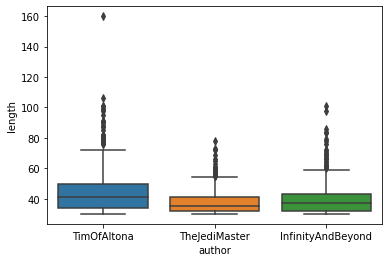

In [325]:
sns.boxplot(x = 'author',y = 'length',data = df)

In [326]:
import praw
import pandas as pd 
import texthero as hero

In [327]:
from texthero import preprocessing

#create a custom cleaning pipeline.

custom_pipeline = [preprocessing.fillna
                   #, preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   #, preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace]
                   #, preprocessing.stem]

#pass the custom_pipeline to the pipeline argument
df['clean_text'] = hero.clean(df['text'], pipeline = custom_pipeline)
df['text'] = df['text'].astype(str)
df['clean_text'] = df['clean_text'].astype(str)
df['clean_text'] = df['clean_text'].replace("'", "")
df

,id,text,length,author,clean_text
0,1,Wonder why this would not be covered under PNG...,51,TimOfAltona,Wonder why this would not be covered under PNG...
1,2,Interesting hypothesis - doubt there will be l...,42,TimOfAltona,Interesting hypothesis doubt there will be lea...
2,3,Spot on - the only problem is that Abbott will...,46,TimOfAltona,Spot on the only problem is that Abbott will n...
3,4,To the contrary - the government have released...,44,TimOfAltona,To the contrary the government have released a...
4,5,The government was always going to take a hit ...,30,TimOfAltona,The government was always going to take a hit ...
...,...,...,...,...,...
1795,1796,If you disagree/find errors with what Wikipedi...,31,InfinityAndBeyond,If you disagree find errors with what Wikipedi...
1796,1797,I don't understand. You say that reducing emis...,39,InfinityAndBeyond,I don t understand You say that reducing emiss...
1797,1798,I do agree with you with the exponential popul...,69,InfinityAndBeyond,I do agree with you with the exponential popul...
1798,1799,But somehow for Australia taking in all the mi...,35,InfinityAndBeyond,But somehow for Australia taking in all the mi...


In [328]:
df['text'] = df['clean_text']

In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [383]:
X_train = Train.text
y_train = Train.author
X_test = Test.text
y_test = Test.author

In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[
('vectorizer', TfidfVectorizer()),
('model', LinearSVC()),
])

# train
svm = clf.fit(X_train,y_train)

predictions1 = svm.predict(X_test)
#print(list(predictions1[0:10]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions1))


0.7711111111111111


In [385]:
vectorizer = TfidfVectorizer()
vectorsTrain = vectorizer.fit_transform(Train.text)
print(vectorsTrain.shape)

(900, 5200)


In [386]:
vectorizer = TfidfVectorizer()
vectorsTest = vectorizer.fit_transform(Test.text)
print(vectorsTest.shape)

(900, 5196)


In [387]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(y_test, predictions1)
cf_matrix1

array([[249,  23,  28],
       [ 47, 222,  31],
       [ 43,  34, 223]], dtype=int64)

Confusion matrix for Unknown Subset based on SVM Classifier
[[249  23  28]
 [ 47 222  31]
 [ 43  34 223]]
Normalized confusion matrix
[[0.83       0.07666667 0.09333333]
 [0.15666667 0.74       0.10333333]
 [0.14333333 0.11333333 0.74333333]]


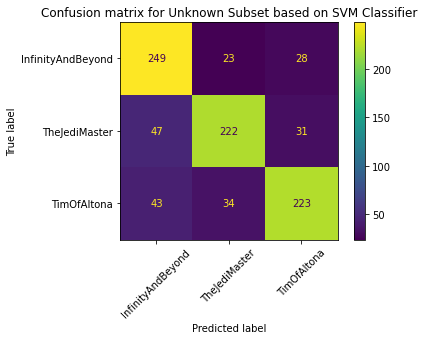

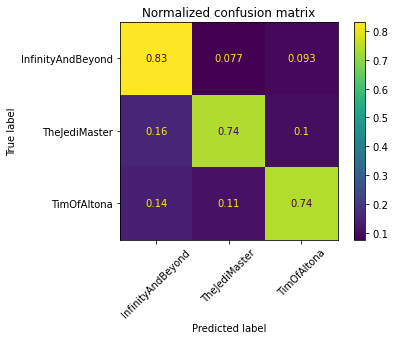

In [404]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix for Unknown Subset based on SVM Classifier", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['InfinityAndBeyond','TheJediMaster','TimOfAltona']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm, X_test, y_test,
                                 display_labels=class_names,
                                 normalize=normalize, xticks_rotation=45)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [335]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions1))

0.7711111111111111


In [336]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, predictions1, average=None)

array([0.83      , 0.74      , 0.74333333])

In [337]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, predictions1, average=None)

array([0.73451327, 0.79569892, 0.79078014])

In [338]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, predictions1, average=None)

array([0.77934272, 0.76683938, 0.76632302])

Normalized confusion matrix
[[0.83       0.07666667 0.09333333]
 [0.15666667 0.74       0.10333333]
 [0.14333333 0.11333333 0.74333333]]


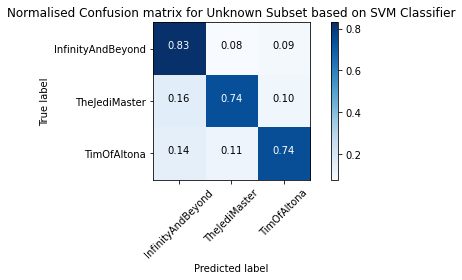

In [406]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

cm = cf_matrix1

# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        print(cm)
        
    

        #print('Confusion matrix, without normalization')
        #print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalised Confusion matrix for Unknown Subset based on SVM Classifier')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        cm = cm

plt.figure()
plot_confusion_matrix(cm, classes=['InfinityAndBeyond','TheJediMaster','TimOfAltona'], normalize=True,title='Normalised Confusion matrix for Unknown Subset based on SVM Classifier')

In [340]:
misclassified_samples = X_test[y_test != predictions1]
misclassified_samples

6      Good to know that Longers was secretly listeni...
10     No I disagree, NATO has some serious fire powe...
21     Sure he could have phrased his argument better...
24     Hang on - the photo was 'designed' by the boy'...
38     Andrews has given us no comfort that he is a f...
                             ...                        
870    I will give you just a few for a start. Exampl...
872    The primary purpose of a law is not to catch c...
875    I see on here the old chestnut of people quoti...
878    SOCIALISTS ARE internationalists. We reject Au...
891    You mean logic, like spending lots of money on...
Name: text, Length: 206, dtype: object

In [341]:
import numpy as np
np.flatnonzero(y_test != predictions1)

array([  6,  10,  21,  24,  38,  40,  44,  46,  48,  50,  61,  65,  66,
        69,  70,  73,  76,  77,  79,  81,  82,  84,  97,  98, 108, 109,
       113, 114, 115, 118, 121, 123, 127, 129, 130, 131, 133, 140, 141,
       156, 158, 159, 161, 163, 165, 166, 169, 172, 176, 177, 179, 180,
       184, 189, 198, 202, 205, 209, 213, 214, 215, 219, 224, 225, 228,
       229, 237, 244, 250, 253, 259, 260, 262, 265, 278, 286, 298, 301,
       303, 309, 313, 323, 325, 326, 331, 337, 338, 342, 343, 346, 347,
       348, 358, 361, 362, 370, 374, 375, 377, 380, 384, 388, 389, 391,
       392, 393, 395, 396, 399, 402, 403, 406, 410, 416, 420, 426, 428,
       431, 438, 442, 445, 452, 454, 456, 464, 466, 467, 469, 473, 474,
       490, 496, 509, 520, 526, 531, 532, 540, 546, 547, 553, 555, 557,
       558, 559, 563, 573, 576, 579, 580, 585, 590, 591, 592, 594, 602,
       608, 609, 611, 613, 616, 620, 623, 627, 642, 647, 648, 650, 662,
       668, 669, 682, 685, 688, 692, 699, 713, 716, 720, 722, 72

In [342]:
for idx, prediction, label in zip(enumerate(X_test), predictions1, y_test):
    if prediction != label:
        print("Sample", idx, ', has been classified as', prediction, 'and should be', label) 

Sample (6, 'Good to know that Longers was secretly listening in on the phone conversations between Putin and Abbott and can offer the PM some sound advice on how to conduct discussions between world leaders in the future.') , has been classified as TheJediMaster and should be TimOfAltona
Sample (10, "No I disagree, NATO has some serious fire power behind it and can stop the Russian military - won't happen though because no-one wants a war with Russia. That said, I don't think Russia would have too many allies coming to it's rescue militarily.") , has been classified as InfinityAndBeyond and should be TimOfAltona
Sample (21, "Sure he could have phrased his argument better and sure he played into the hands of the usual anti-government minority groups, but facts are facts and shooting the messenger is the easy route that achieves little - the challenge is how to get the nation's finances back on track to sustain this country for future generations. ") , has been classified as InfinityAndB

In [343]:
Test["text"].iloc[38]

'Andrews has given us no comfort that he is a future premier nor can lead a viable alternative government. In fact there are very big questions over his bona fides - particularly where his links to the CFMEU are concerned. '

In [344]:
df1 = df[df["author"] == 'InfinityAndBeyond']
df2 = df[df["author"] == 'TimOfAltona']
df3 = df[df["author"] == 'TheJediMaster']

In [345]:
text1 = list(df1.text.values)
tf_vectorizer = CountVectorizer(#ngram_range = (1,2),
    #max_df=0.95, min_df=2,
                                stop_words='english')
tf1 = tf_vectorizer.fit_transform(text1)
print(tf_vectorizer.get_feature_names())


['100m', '10b', '10m', '11th', '12g', '14k', '16b', '170m2', '1b', '20b', '20k', '20m', '25k', '25m', '2c', '2m', '2pp', '35k', '3b', '3br', '400k', '400m', '40k', '44yo', '480k', '50k', '56b', '5b', '5km', '5mbit', '60k', '625k', '75k', '76m', '900k', '9mm', 'a380', 'abatement', 'abbott', 'abbotts', 'abc', 'abi', 'abide', 'ability', 'able', 'abolished', 'abolishing', 'aboriginal', 'aboriginals', 'absolutely', 'absorbed', 'abundantly', 'accept', 'acceptable', 'accepted', 'accepts', 'access', 'accident', 'accommodated', 'accord', 'according', 'account', 'accountancy', 'accountants', 'accounts', 'accumulating', 'accuracy', 'accurate', 'achieve', 'achieved', 'acknowledge', 'act', 'acting', 'action', 'activate', 'activated', 'activating', 'activation', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'additional', 'adds', 'administer', 'administrative', 'admission', 'admitting', 'adopt', 'adrian', 'ads', 'advance', 'advantage', 'advocate', 'advocates', 'affect', 'afford', 'affordabili

In [346]:
text2 = list(df2.text.values)
tf_vectorizer = CountVectorizer(#ngram_range = (1,2),
    #max_df=0.95, min_df=2,
                                stop_words='english')
tf2 = tf_vectorizer.fit_transform(text2)
print(tf_vectorizer.get_feature_names())


['10th', '17th', '18th', '4pm', '4wd', '50km', '5k', '5m', '5pm', '9pm', 'abbott', 'abc', 'abe', 'abide', 'abilities', 'ability', 'abject', 'able', 'aboriginal', 'abs', 'absolute', 'absolutely', 'absorb', 'abuse', 'abuses', 'abusing', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessed', 'accidents', 'accommodate', 'accompanying', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accusing', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'aching', 'acknowledge', 'acknowledges', 'acknowledging', 'acknowledgment', 'act', 'acting', 'action', 'actions', 'active', 'actively', 'activist', 'activists', 'actu', 'actual', 'actually', 'adage', 'add', 'additional', 'address', 'adf', 'admin', 'administration', 'administrator', 'admirable', 'admit', 'admittedly', 'adopt', 'adoring', 'ads', 'adulation', 'adult', 'adults', 'advance', 'advertising', 'advice', 'advised', 'advising', 'advocate', 'advocates', 'affairs', 'affect', 

In [347]:
import numpy as np
np.flatnonzero(y_test == predictions1)

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  22,  23,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  39,  41,  42,  43,  45,
        47,  49,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,
        63,  64,  67,  68,  71,  72,  74,  75,  78,  80,  83,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 110, 111, 112, 116, 117, 119, 120,
       122, 124, 125, 126, 128, 132, 134, 135, 136, 137, 138, 139, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       157, 160, 162, 164, 167, 168, 170, 171, 173, 174, 175, 178, 181,
       182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196,
       197, 199, 200, 201, 203, 204, 206, 207, 208, 210, 211, 212, 216,
       217, 218, 220, 221, 222, 223, 226, 227, 230, 231, 232, 233, 234,
       235, 236, 238, 239, 240, 241, 242, 243, 245, 246, 247, 24

In [348]:
df["text"].iloc[0]

'Wonder why this would not be covered under PNG law last I looked Manus was part of another sovereign state Presumably our friends down at Maurice Blackburn feel they have a better chance of getting money from the Australian government than the PNG government Will be an interesting test case'

In [349]:
for idx, prediction, label in zip(enumerate(X_test), predictions1, y_test):
    if prediction == label:
        print("Sample", idx, ', has been classified as', prediction, 'and should be', label) 

Sample (0, 'Actually Matt, it was the Japanese that posed the biggest threat to Australia during WWII, but your sentiments are still accurate - it was the US that ended the war and before that lost thousands of troops fighting the Japanese advance towards Australia.') , has been classified as TimOfAltona and should be TimOfAltona
Sample (1, "Wrong thread pal - if you scroll up you will see this is a story about Iraq, nothing to do with Ukraine. Perhaps it's time you stopped using Guardian threads as your own personal bulletin board? ") , has been classified as TimOfAltona and should be TimOfAltona
Sample (2, 'Good comment - unfortunately the Labor/Greens cheer squad blindly oppose anything and everything this government does - no matter how many lives may be saved - the last thing they want to see is this government being credited with saving lives through humanitarian action. ') , has been classified as TimOfAltona and should be TimOfAltona
Sample (3, "Tony Abbott has already been cre

Sample (390, "A most ignorant post. Whether it was the Chinese, Japanese, Spanish, Portugese, Indonesians, Indians, Dutch, Americans, Mexicans, Chileans - take your pick - Australia would have been colonised at some point along the way. It's always been the way of mankind. Reading articles like this one you would think that time should stand still.  ") , has been classified as TheJediMaster and should be TheJediMaster
Sample (394, "Aboriginals seem to think that they should be able to - right now - have and own the entire continent of Australia for themselves. Thousands of years of human development suggests they're dreaming.") , has been classified as TheJediMaster and should be TheJediMaster
Sample (397, "Howard was perfectly within his rights to do so Daisy. Besides, being a Lodge resident has had no bearing on the quality of Prime Ministerships, so not sure why it's a big deal.") , has been classified as TheJediMaster and should be TheJediMaster
Sample (398, "When Gillard was boote

Sample (894, 'If something in Wikipedia is obviously wrong it is corrected by peer reviewers from all walks of life. Climate Council is an echo chamber of people with a common agenda and not reliable with the truth. ') , has been classified as InfinityAndBeyond and should be InfinityAndBeyond
Sample (895, 'If you disagree/find errors with what Wikipedia has, I am happy to discuss it with evidence provided. But not interested in dismissing Wikipedia because you prefer what a propaganda website says.') , has been classified as InfinityAndBeyond and should be InfinityAndBeyond
Sample (896, "I don't understand. You say that reducing emissions is urgent, yet you are happy for China to increase their emissions. That means by 2030 the worlds global emissions will be higher than today. And you are happy with that?") , has been classified as InfinityAndBeyond and should be InfinityAndBeyond
Sample (897, 'I do agree with you with the exponential population growth. Many are hoping for a flattenin

In [370]:
authors = df.author
vectorizer = TfidfVectorizer(ngram_range=(1,2))
                                #stop_words='english')
vectorsNGRAM = vectorizer.fit_transform(df['text'])
print(vectorsNGRAM.shape)

X_train, X_test, y_train, y_test = train_test_split(vectorsNGRAM, authors, test_size=0.5, random_state=121)
svm = LinearSVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))

(1800, 47471)
0.8566666666666667


In [368]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[
('vectorizer', TfidfVectorizer(ngram_range=(1,2), min_df=1)),
('model', LinearSVC()),
])

# train
svm = clf.fit(X_train,y_train)

predictions2 = svm.predict(X_test)
#print(list(predictions1[0:10]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions2))

0.7733333333333333


In [234]:
def load_function_words(path):
    function_words = []
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            function_words.append(line.split()[0])
    return function_words
function_words = load_function_words('function_words.txt')

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[
('vectorizer', TfidfVectorizer(vocabulary=function_words)),
('model', LinearSVC()),
])

# train
svm = clf.fit(X_train,y_train)

predictions3 = svm.predict(X_test)
#print(list(predictions1[0:10]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions3))

0.6011111111111112


In [260]:
user1 = df[df.author=="InfinityAndBeyond"]["text"].values 
user2 = df[df.author=="TheJediMaster"]["text"].values
user3 = df[df.author=="TimOfAltona"]["text"].values

In [380]:
df1 = df[df["author"] == 'InfinityAndBeyond']
df2 = df[df["author"] == 'TimOfAltona']
df3 = df[df["author"] == 'TheJediMaster']

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

## Number of words in the text ##
df1["num_words"] = df1["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df1["num_unique_words"] = df1["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df1["num_chars"] = df1["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df1["num_stopwords"] = df1["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df1["num_punctuations"] =df1['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df1["num_words_upper"] = df1["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df1["num_words_title"] = df1["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df1["mean_word_len"] = df1["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



<ipython-input-380-4cdefb460ea7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["num_words"] = df1["text"].apply(lambda x: len(str(x).split()))
<ipython-input-380-4cdefb460ea7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["num_unique_words"] = df1["text"].apply(lambda x: len(set(str(x).split())))
<ipython-input-380-4cdefb460ea7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [381]:
df1

,id,text,length,author,clean_text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
1200,1201,Some people will be happy with a day of batter...,57,InfinityAndBeyond,Some people will be happy with a day of batter...,55,40,274,31,0,0,2,4.000000
1201,1202,Once it is a grid based system there is no per...,40,InfinityAndBeyond,Once it is a grid based system there is no per...,39,30,211,23,0,0,3,4.435897
1202,1203,I don t think anyone would complain about a so...,47,InfinityAndBeyond,I don t think anyone would complain about a so...,48,43,259,23,0,2,3,4.416667
1203,1204,But the politicians should be convincing the p...,42,InfinityAndBeyond,But the politicians should be convincing the p...,42,35,247,25,0,0,3,4.904762
1204,1205,I would hate it if I bought my idyllic country...,30,InfinityAndBeyond,I would hate it if I bought my idyllic country...,27,25,155,11,0,2,2,4.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1796,If you disagree find errors with what Wikipedi...,31,InfinityAndBeyond,If you disagree find errors with what Wikipedi...,32,28,192,17,0,1,5,5.031250
1796,1797,I don t understand You say that reducing emiss...,39,InfinityAndBeyond,I don t understand You say that reducing emiss...,39,33,212,22,0,1,5,4.461538
1797,1798,I do agree with you with the exponential popul...,69,InfinityAndBeyond,I do agree with you with the exponential popul...,68,52,395,32,0,1,4,4.823529
1798,1799,But somehow for Australia taking in all the mi...,35,InfinityAndBeyond,But somehow for Australia taking in all the mi...,36,33,183,22,0,1,3,4.111111


In [382]:
df1.describe()

,id,length,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0,600.000000,600.000000,600.000000
mean,1500.500000,39.315000,38.693333,31.973333,205.913333,20.610000,0.0,0.631667,3.235000,4.341219
std,173.349358,9.890339,10.015812,7.224468,57.544865,6.197735,0.0,0.954384,1.902404,0.426763
min,1201.000000,30.000000,25.000000,18.000000,120.000000,8.000000,0.0,0.000000,0.000000,2.968750
25%,1350.750000,32.000000,32.000000,27.000000,168.000000,17.000000,0.0,0.000000,2.000000,4.053698
50%,1500.500000,37.000000,36.000000,30.000000,190.000000,19.000000,0.0,0.000000,3.000000,4.327957
75%,1650.250000,43.000000,43.000000,35.000000,229.000000,23.000000,0.0,1.000000,4.000000,4.605463
max,1800.000000,101.000000,100.000000,71.000000,557.000000,64.000000,0.0,7.000000,15.000000,6.531250


In [280]:
df2 = df2

from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

## Number of words in the text ##
df2["num_words"] = df2["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df2["num_unique_words"] = df2["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df2["num_chars"] = df2["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df2["num_stopwords"] = df2["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df2["num_punctuations"] =df2['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df2["num_words_upper"] = df2["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df2["num_words_title"] = df2["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df2["mean_word_len"] = df2["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


<ipython-input-280-302f9c997e8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_words"] = df2["text"].apply(lambda x: len(str(x).split()))
<ipython-input-280-302f9c997e8e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_unique_words"] = df2["text"].apply(lambda x: len(set(str(x).split())))
<ipython-input-280-302f9c997e8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [281]:
df2.describe()

,id,length,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0,600.000000,600.000000,600.000000
mean,300.500000,44.706667,43.743333,36.880000,242.588333,21.553333,0.0,0.771667,4.456667,4.573087
std,173.349358,14.589221,14.483683,10.167492,81.385020,8.004829,0.0,0.985469,3.207585,0.423073
min,1.000000,30.000000,26.000000,20.000000,136.000000,1.000000,0.0,0.000000,0.000000,3.451613
25%,150.750000,34.000000,33.000000,30.000000,185.000000,16.000000,0.0,0.000000,2.000000,4.310920
50%,300.500000,41.000000,40.000000,34.500000,222.500000,20.000000,0.0,1.000000,4.000000,4.542572
75%,450.250000,50.000000,49.250000,41.000000,274.000000,25.000000,0.0,1.000000,6.000000,4.794452
max,600.000000,160.000000,157.000000,101.000000,795.000000,81.000000,0.0,8.000000,35.000000,7.153846


In [278]:
df3 = df3

from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

## Number of words in the text ##
df3["num_words"] = df3["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df3["num_unique_words"] = df3["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df3["num_chars"] = df3["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df3["num_stopwords"] = df3["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df3["num_punctuations"] =df3['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df3["num_words_upper"] = df3["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df3["num_words_title"] = df3["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df3["mean_word_len"] = df3["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


<ipython-input-278-9b28d24281a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["num_words"] = df3["text"].apply(lambda x: len(str(x).split()))
<ipython-input-278-9b28d24281a1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["num_unique_words"] = df3["text"].apply(lambda x: len(set(str(x).split())))
<ipython-input-278-9b28d24281a1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [279]:
df3.describe()

,id,length,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0,600.000000,600.000000,600.000000
mean,900.500000,37.666667,37.840000,33.208333,203.861667,18.371667,0.0,0.546667,4.145000,4.411553
std,173.349358,7.631467,7.874288,6.149088,46.519594,4.715640,0.0,0.803470,2.089158,0.426364
min,601.000000,30.000000,25.000000,19.000000,130.000000,8.000000,0.0,0.000000,1.000000,3.437500
25%,750.750000,32.000000,32.000000,29.000000,172.750000,15.000000,0.0,0.000000,3.000000,4.104588
50%,900.500000,35.000000,36.000000,32.000000,193.000000,18.000000,0.0,0.000000,4.000000,4.392081
75%,1050.250000,41.000000,42.000000,36.000000,226.000000,21.000000,0.0,1.000000,5.000000,4.666667
max,1200.000000,78.000000,76.000000,65.000000,447.000000,39.000000,0.0,4.000000,19.000000,5.686567
